In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

import gc
from pathlib import Path

In [5]:
# Start with input file path

# Create table with list of CSV files to be read in, w/ corresponding df name
# This does include large 'train' data set (read in separately)
csv_and_df_names = pd.DataFrame(data = {
  'csv_name': ['seasons', 'teams', 'players', 'awards',
    'example_test', 'example_sample_submission'],
  'df_name': ['seasons', 'teams', 'players', 'awards_pre2018',
    'example_test', 'example_sample_submission'] 
  })

# Set up for tabbed output
kaggle_data_tabs = widgets.Tab()

# Add Output widgets for each (eventual) DF as tabs' children
kaggle_data_tabs.children = list([widgets.Output() for df_name 
  in csv_and_df_names['df_name']])

for index, row in csv_and_df_names.iterrows():
    
    csv_name = row['csv_name']
    df_name = row['df_name']
    
    # Read from CSV and create df with specified name in environment
    globals()[df_name] = pd.read_csv(f"{csv_name}.csv")

    # Set tab title to df name
    kaggle_data_tabs.set_title(index, df_name)
    
    # Display corresponding table output for this tab name
    with kaggle_data_tabs.children[index]:
        display(eval(df_name))

display(kaggle_data_tabs)

Tab(children=(Output(), Output(), Output(), Output(), Output(), Output()), _titles={'0': 'seasons', '1': 'teams', '2': 'players', '3': 'awards_pre2018', '4': 'example_test', '5': 'example_sample_submission'})

In [6]:
train = pd.read_csv('train.csv')

# Convert training data date field to pandas datetime type
train['date'] = pd.to_datetime(train['date'], format = "%Y%m%d")

display(train.info())

display(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 12 columns):
date                       1216 non-null datetime64[ns]
nextDayPlayerEngagement    1216 non-null object
games                      639 non-null object
rosters                    1216 non-null object
playerBoxScores            538 non-null object
teamBoxScores              538 non-null object
transactions               1103 non-null object
standings                  531 non-null object
awards                     294 non-null object
events                     536 non-null object
playerTwitterFollowers     40 non-null object
teamTwitterFollowers       40 non-null object
dtypes: datetime64[ns](1), object(11)
memory usage: 114.1+ KB


None

,date,nextDayPlayerEngagement,games,rosters,playerBoxScores,teamBoxScores,transactions,standings,awards,events,playerTwitterFollowers,teamTwitterFollowers
0,2018-01-01,"[{""engagementMetricsDate"":""2018-01-02"",""player...",NaN,"[{""playerId"":400121,""gameDate"":""2018-01-01"",""t...",NaN,NaN,"[{""transactionId"":340732,""playerId"":547348,""pl...",NaN,NaN,NaN,"[{""date"":""2018-01-01"",""playerId"":545361,""playe...","[{""date"":""2018-01-01"",""teamId"":147,""teamName"":..."
1,2018-01-02,"[{""engagementMetricsDate"":""2018-01-03"",""player...",NaN,"[{""playerId"":134181,""gameDate"":""2018-01-02"",""t...",NaN,NaN,"[{""transactionId"":339458,""playerId"":621173,""pl...",NaN,NaN,NaN,NaN,NaN
2,2018-01-03,"[{""engagementMetricsDate"":""2018-01-04"",""player...",NaN,"[{""playerId"":425492,""gameDate"":""2018-01-03"",""t...",NaN,NaN,"[{""transactionId"":347527,""playerId"":572389,""pl...",NaN,NaN,NaN,NaN,NaN
3,2018-01-04,"[{""engagementMetricsDate"":""2018-01-05"",""player...",NaN,"[{""playerId"":282332,""gameDate"":""2018-01-04"",""t...",NaN,NaN,"[{""transactionId"":339549,""playerId"":545343,""pl...",NaN,NaN,NaN,NaN,NaN
4,2018-01-05,"[{""engagementMetricsDate"":""2018-01-06"",""player...",NaN,"[{""playerId"":282332,""gameDate"":""2018-01-05"",""t...",NaN,NaN,"[{""transactionId"":341195,""playerId"":628336,""pl...",NaN,NaN,NaN,NaN,NaN
5,2018-01-06,"[{""engagementMetricsDate"":""2018-01-07"",""player...",NaN,"[{""playerId"":425772,""gameDate"":""2018-01-06"",""t...",NaN,NaN,"[{""transactionId"":339712,""playerId"":678962,""pl...",NaN,NaN,NaN,NaN,NaN
6,2018-01-07,"[{""engagementMetricsDate"":""2018-01-08"",""player...",NaN,"[{""playerId"":134181,""gameDate"":""2018-01-07"",""t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-01-08,"[{""engagementMetricsDate"":""2018-01-09"",""player...",NaN,"[{""playerId"":408045,""gameDate"":""2018-01-08"",""t...",NaN,NaN,"[{""transactionId"":341204,""playerId"":458913,""pl...",NaN,NaN,NaN,NaN,NaN
8,2018-01-09,"[{""engagementMetricsDate"":""2018-01-10"",""player...",NaN,"[{""playerId"":134181,""gameDate"":""2018-01-09"",""t...",NaN,NaN,"[{""transactionId"":339834,""playerId"":642091,""pl...",NaN,NaN,NaN,NaN,NaN
9,2018-01-10,"[{""engagementMetricsDate"":""2018-01-11"",""player...",NaN,"[{""playerId"":134181,""gameDate"":""2018-01-10"",""t...",NaN,NaN,"[{""transactionId"":358621,""playerId"":650645,""pl...",NaN,NaN,NaN,NaN,NaN


In [7]:
# Get names of all "nested" data frames in daily training set
daily_data_nested_df_names = train.drop('date', axis = 1).columns.values.tolist()

for df_name in daily_data_nested_df_names:
    date_nested_table = train[['date', df_name]]

    date_nested_table = (date_nested_table[
      ~pd.isna(date_nested_table[df_name])
      ].
      reset_index(drop = True)
      )
    
    daily_dfs_collection = []
    
    for date_index, date_row in date_nested_table.iterrows():
        daily_df = pd.read_json(date_row[df_name])
        
        daily_df['dailyDataDate'] = date_row['date']
        
        daily_dfs_collection = daily_dfs_collection + [daily_df]

    # Concatenate all daily dfs into single df for each row
    unnested_table = (pd.concat(daily_dfs_collection,
      ignore_index = True).
      # Set and reset index to move 'dailyDataDate' to front of df
      set_index('dailyDataDate').
      reset_index()
      )
    
    # Creates 1 pandas df per unnested df from daily data read in, with same name
    globals()[df_name] = unnested_table    
    
    # Clean up tables and collection of daily data frames for this df
    del(date_nested_table, daily_dfs_collection, unnested_table)

# Set up for tabbed output
daily_data_unnested_tabs = widgets.Tab()

# Add Output widgets for each (eventual) DF as tabs' children
daily_data_unnested_tabs.children = list([widgets.Output() 
  for df_name in daily_data_nested_df_names])

for index in range(0, len(daily_data_nested_df_names)):
    df_name = daily_data_nested_df_names[index]
    
    # Rename tab bar titles to df names
    daily_data_unnested_tabs.set_title(index, df_name)

    # Display corresponding table output for this tab name
    with daily_data_unnested_tabs.children[index]:
        display(eval(df_name))

display(daily_data_unnested_tabs)

Tab(children=(Output(), Output(), Output(), Output(), Output(), Output(), Output(), Output(), Output(), Output(), Output()), _titles={'0': 'nextDayPlayerEngagement', '1': 'games', '2': 'rosters', '3': 'playerBoxScores', '4': 'teamBoxScores', '5': 'transactions', '6': 'standings', '7': 'awards', '8': 'events', '9': 'playerTwitterFollowers', '10': 'teamTwitterFollowers'})

In [8]:
del(train)

gc.collect()

585

**Correlation between targets**

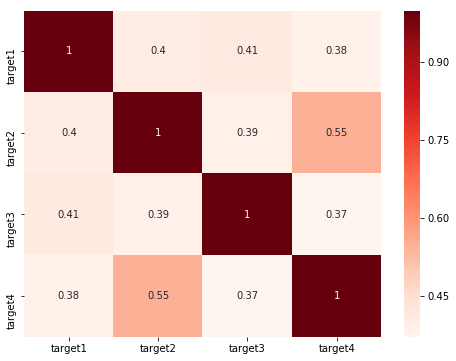

In [13]:
plt.figure(figsize=(8,6))
cor = nextDayPlayerEngagement[['target1','target2','target3','target4']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Relationship between important player-level stats with our target**

*Compute averagre of the four targets*

In [56]:
player_eng_info = nextDayPlayerEngagement.copy()
player_eng_info['target1To4Avg'] = np.mean(
  player_eng_info[['target1', 'target2', 'target3', 'target4']],
  axis = 1)

In [57]:
player_eng_info = player_eng_info[player_eng_info['dailyDataDate'] >='2018-03-29']
player_eng_info = pd.merge(
  player_eng_info,
  playerBoxScores[['dailyDataDate','playerId','gamePk','teamId', 'playerName', 'runsScored', 'atBats', 'homeRuns','flyOuts','hits','strikes',
                   'balks','errors','chances','rbi']],
   on = ['dailyDataDate','playerId'],
   how = 'inner'
   )


In [58]:
player_eng_info.head()

,dailyDataDate,engagementMetricsDate,playerId,target1,target2,target3,target4,target1To4Avg,gamePk,teamId,...,runsScored,atBats,homeRuns,flyOuts,hits,strikes,balks,errors,chances,rbi
0,2018-03-29,2018-03-30,608365,2.040838,7.893376,0.052359,2.599964,3.146634,529407,112,...,1.0,3.0,0.0,0.0,2.0,NaN,NaN,1.0,9.0,0.0
1,2018-03-29,2018-03-30,502624,1.068945,5.105543,2.722191,0.918550,2.453807,529413,158,...,1.0,2.0,0.0,0.0,1.0,61.0,0.0,0.0,0.0,0.0
2,2018-03-29,2018-03-30,643338,0.385945,5.368812,0.074404,0.565661,1.598706,529415,147,...,NaN,NaN,NaN,NaN,NaN,14.0,0.0,0.0,1.0,NaN
3,2018-03-29,2018-03-30,570560,0.131860,6.200931,0.002296,0.181634,1.629180,529408,145,...,1.0,4.0,0.0,0.0,1.0,NaN,NaN,0.0,5.0,3.0
4,2018-03-29,2018-03-30,523260,0.011800,9.933713,6.076820,0.978230,4.250141,529406,111,...,NaN,NaN,NaN,NaN,NaN,13.0,0.0,NaN,NaN,NaN


**Correlation matrix between them**

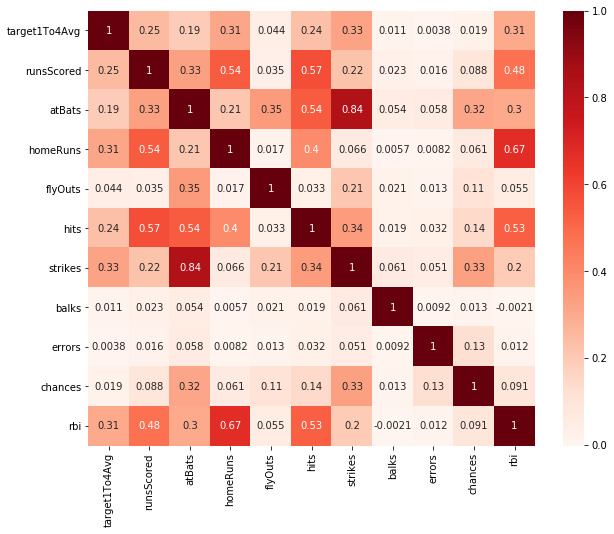

In [59]:
plt.figure(figsize=(10,8))
cor = player_eng_info[['target1To4Avg','runsScored','atBats','homeRuns','flyOuts','hits','strikes',
                   'balks','errors','chances','rbi']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

*note : There are some features highly correlated with each other and we may choose only one from them and neglect the other*

In [60]:
standings_stats = pd.merge(
  player_eng_info,
  standings[['dailyDataDate','teamId','wins','losses','pct','xWinLossPct','divisionRank']],
   on = ['dailyDataDate','teamId'],
   how = 'inner'
   )

**Correlation between important stats from standings data and target**

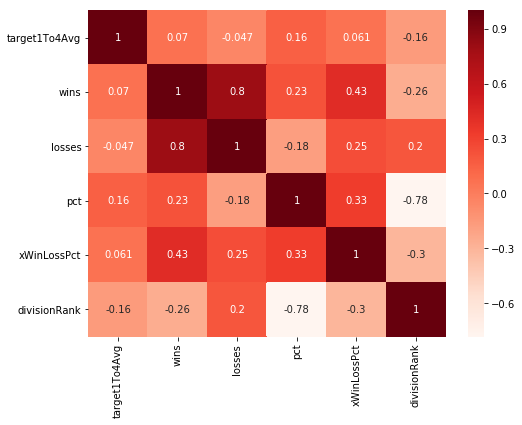

In [64]:
plt.figure(figsize=(8,6))
cor = standings_stats[['target1To4Avg','wins','losses','pct','xWinLossPct','divisionRank']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [66]:
averaged_data = standings_stats.groupby('dailyDataDate', as_index=True)[['target1To4Avg','runsScored','atBats','homeRuns','flyOuts','hits','strikes',
                   'balks','errors','chances','rbi','pct','xWinLossPct','divisionRank']].mean()

In [67]:
averaged_data.head()

,target1To4Avg,runsScored,atBats,homeRuns,flyOuts,hits,strikes,balks,errors,chances,rbi,pct,xWinLossPct,divisionRank
dailyDataDate,,,,,,,,,,,,,,
2018-03-29,3.157729,0.339286,2.654762,0.098214,0.309524,0.622024,18.805970,0.007463,0.038328,3.407666,0.324405,0.498765,0.148148,3.014815
2018-03-30,4.732392,0.288136,2.783051,0.050847,0.474576,0.606780,20.618182,0.000000,0.081081,3.498069,0.274576,0.494135,0.071848,3.190616
2018-03-31,3.004417,0.398281,2.742120,0.091691,0.389685,0.693410,21.544715,0.008130,0.051118,3.182109,0.381089,0.500410,0.155597,3.014742
2018-04-01,4.292756,0.368421,3.003759,0.105263,0.473684,0.714286,22.432990,0.000000,0.019920,3.390438,0.349624,0.502517,0.137477,3.078550
2018-04-02,3.682376,0.312903,2.683871,0.096774,0.354839,0.641935,21.453704,0.009259,0.048148,3.355556,0.306452,0.500866,0.259721,2.911681


**Plot Average of targets of all players for each day across time and compare it with average of strikes**

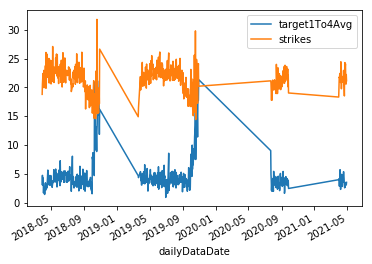

In [71]:
averaged_data[['target1To4Avg','strikes']].plot()
plt.show()

*note : There is some similarity in their behavior across time*

**Plot Average of targets of all players for each day across time and compare it with average of atBats**

In [82]:
averaged_data['atBats'] = averaged_data['atBats']*10

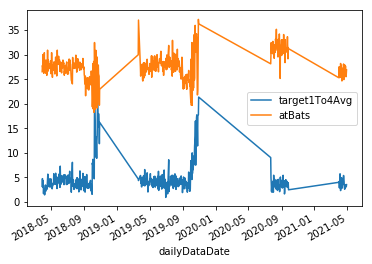

In [83]:
averaged_data[['target1To4Avg','atBats']].plot()
plt.show()

*note : There is some similarity in their behavior across time*

**Plot Average of targets of all players for each day across time and compare it with average of xWinLossPct**

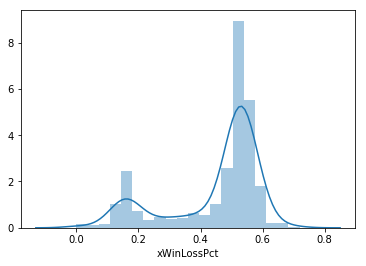

In [73]:
sns.distplot(averaged_data['xWinLossPct'])
plt.show()

In [88]:
averaged_data['xWinLossPct'] = averaged_data['xWinLossPct']*50

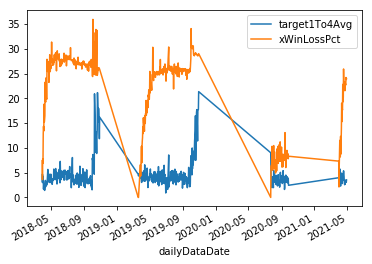

In [89]:
averaged_data[['target1To4Avg','xWinLossPct']].plot()
plt.show()

*note : There is some similarity in their behavior across time*

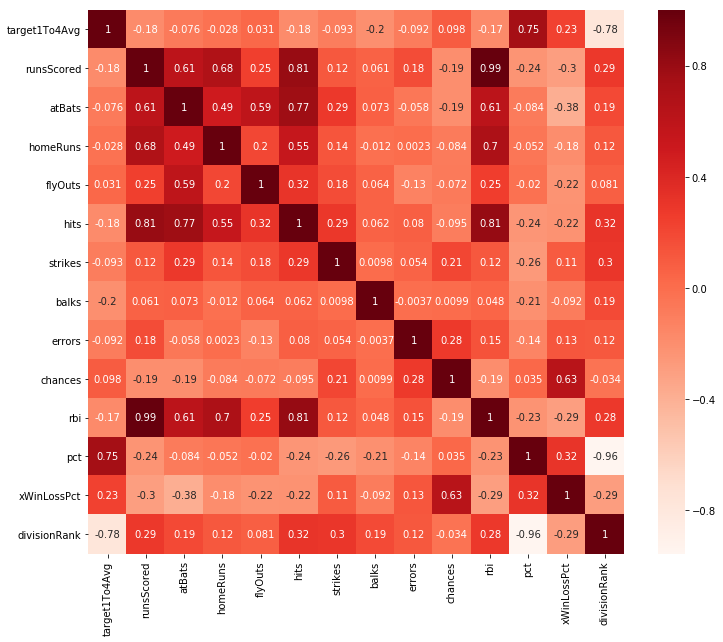

In [91]:
plt.figure(figsize=(12,10))
cor = averaged_data[['target1To4Avg','runsScored','atBats','homeRuns','flyOuts','hits','strikes',
                   'balks','errors','chances','rbi','pct','xWinLossPct','divisionRank']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**We see here that 'pct' variable has strong positive correlation with target variable after computing averages of them per every unique day**

**Also 'divisionRank' variable has strong negative correlation with target**

*Before grouping data by unique days and computing averages of variables, the correlation between target and 'pct' was only **0.16** and was **-0.16** with 'divisionRank'*

**We can also see here that 'divisionRank' variable has completely opposite behavior compared to target across time **

In [99]:
averaged_data['divisionRank'] = averaged_data['divisionRank']*10

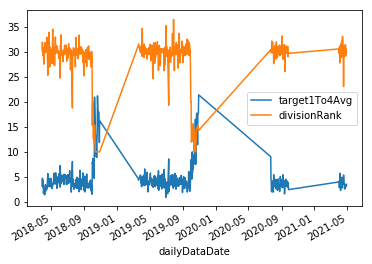

In [100]:
averaged_data[['target1To4Avg','divisionRank']].plot()
plt.show()

**And here we see that 'Current winning percentage' or 'pct' variable has almost the same behavior as target**

In [105]:
averaged_data['pct'] = averaged_data['pct']*50

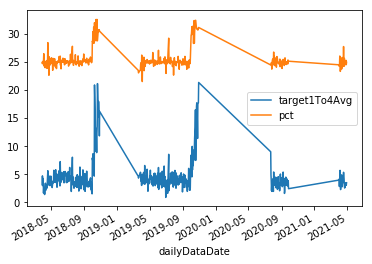

In [106]:
averaged_data[['target1To4Avg','pct']].plot()
plt.show()